In [0]:
#keras
!pip install -q keras

In [3]:
import keras

Using TensorFlow backend.


In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation,Add
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [0]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [6]:
print(X_test.shape)

(10000, 28, 28)


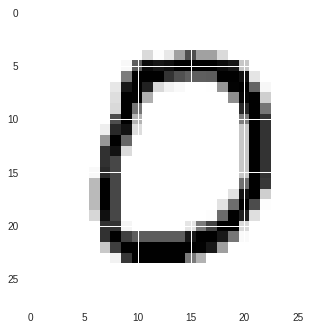

In [7]:
from matplotlib import pyplot as plt
plt.imshow(X_test[10])

In [0]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [0]:
X_train=X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255

In [10]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [0]:
Y_train=np_utils.to_categorical(Y_train, 10)
Y_test=np_utils.to_categorical(Y_test,10)

In [12]:
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [64]:
model=Sequential()

model.add(Conv2D(32,3,3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(16,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(24,3,3,activation='relu'))
model.add(Conv2D(16,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Conv2D(10,3,3,activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.27))
model.add(Flatten())
model.add(Dropout(0.27))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys


In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 10, 10, 24)        3480      
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 8, 8, 16)          3472      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 4, 4, 16)          0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [67]:
hist = model.fit(X_train,Y_train,batch_size=32,nb_epoch=20,verbose=1,validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 112s 2ms/step - loss: 0.3163 - acc: 0.8977 - val_loss: 0.0628 - val_acc: 0.9792
Epoch 2/20
60000/60000 [==============================] - 112s 2ms/step - loss: 0.1133 - acc: 0.9651 - val_loss: 0.0419 - val_acc: 0.9856
Epoch 3/20
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0878 - acc: 0.9728 - val_loss: 0.0361 - val_acc: 0.9878
Epoch 4/20
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0747 - acc: 0.9766 - val_loss: 0.0331 - val_acc: 0.9894
Epoch 5/20
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0664 - acc: 0.9800 - val_loss: 0.0257 - val_acc: 0.9913
Epoch 6/20
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0610 - acc: 0.9815 - val_loss: 0.0298 - val_acc: 0.9902
Epoch 7/20
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0573 - acc: 0.9828 - val_loss: 0.0292 - 

In [0]:
score=model.evaluate(X_test,Y_test,verbose=0)

In [69]:
print(score)

[0.01828788585179718, 0.9944]


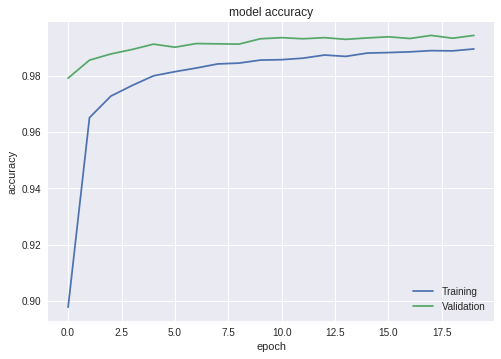

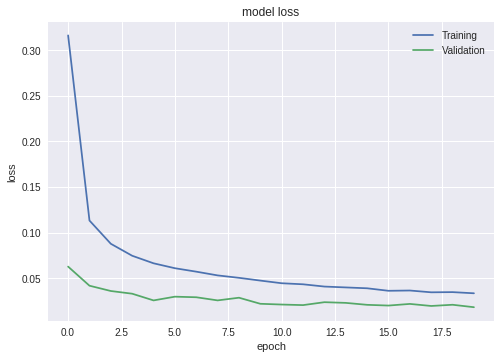

In [70]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training','Validation'],loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training','Validation'], loc='upper right')
plt.show()

In [0]:
model.save_weights("mnist_99.44_14465_param.h5")